<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_cluster_data(y_hat)_add_delta_(_0_4)_n20_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import os
import statistics as stats
import scipy.stats as ss
import scipy.stats as st
from scipy.stats import f_oneway
from scipy import stats
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import drive
from statsmodels.formula.api import ols
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_-0.4'

In [4]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-0.4_n20.csv')

In [5]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.058769,69.277009,0.288843,170.624620,170.070113,0.554507
1,0.0,1.0,60.677823,99.669209,-0.232860,170.114172,170.112966,0.001206
2,0.0,2.0,71.958544,68.761594,-0.279486,150.440652,150.549004,-0.108352
3,0.0,3.0,27.658269,75.884453,0.057508,113.600230,113.559186,0.041044
4,0.0,4.0,91.869664,95.186306,-0.525482,196.530488,196.687790,-0.157302
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.794421,28.517975,0.729495,63.041891,62.751959,0.289932
19996,999.0,16.0,38.569473,51.742528,0.421735,100.733736,100.503830,0.229907
19997,999.0,17.0,87.886143,81.105405,-0.053194,178.938355,178.637081,0.301274
19998,999.0,18.0,27.511540,81.955787,-0.611506,118.855821,119.567238,-0.711418


In [6]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

In [7]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

In [8]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,91.058769,69.277009,0.288843,170.624620,170.070113,0.554507
1,0.0,1.0,60.677823,99.669209,-0.232860,170.114172,170.112966,0.001206
2,0.0,2.0,71.958544,68.761594,-0.279486,150.440652,150.549004,-0.108352
3,0.0,3.0,27.658269,75.884453,0.057508,113.600230,113.559186,0.041044
4,0.0,4.0,91.869664,95.186306,-0.525482,196.530488,196.687790,-0.157302
...,...,...,...,...,...,...,...,...
19995,999.0,15.0,23.794421,28.517975,0.729495,63.041891,62.751959,0.289932
19996,999.0,16.0,38.569473,51.742528,0.421735,100.733736,100.503830,0.229907
19997,999.0,17.0,87.886143,81.105405,-0.053194,178.938355,178.637081,0.301274
19998,999.0,18.0,27.511540,81.955787,-0.611506,118.855821,119.567238,-0.711418


In [9]:
table.set_index(['rep', 'index'], inplace=True)

In [10]:
table

x1         x2         e           Y       y_hat     e_hat
rep   index                                                                  
0.0   0.0    91.058769  69.277009  0.288843  170.624620  170.070113  0.554507
      1.0    60.677823  99.669209 -0.232860  170.114172  170.112966  0.001206
      2.0    71.958544  68.761594 -0.279486  150.440652  150.549004 -0.108352
      3.0    27.658269  75.884453  0.057508  113.600230  113.559186  0.041044
      4.0    91.869664  95.186306 -0.525482  196.530488  196.687790 -0.157302
...                ...        ...       ...         ...         ...       ...
999.0 15.0   23.794421  28.517975  0.729495   63.041891   62.751959  0.289932
      16.0   38.569473  51.742528  0.421735  100.733736  100.503830  0.229907
      17.0   87.886143  81.105405 -0.053194  178.938355  178.637081  0.301274
      18.0   27.511540  81.955787 -0.611506  118.855821  119.567238 -0.711418
      19.0   49.265420  39.715064  0.076185   99.056670   99.161018 -0.104348

[20000 rows x 6 columns]

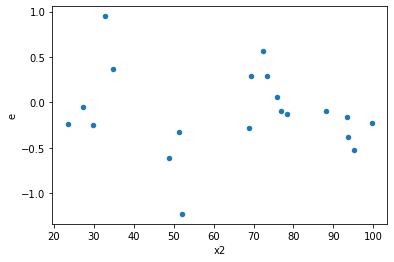

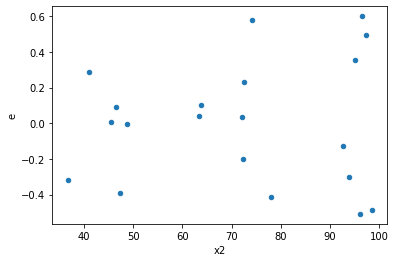

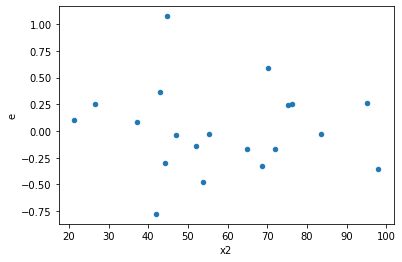

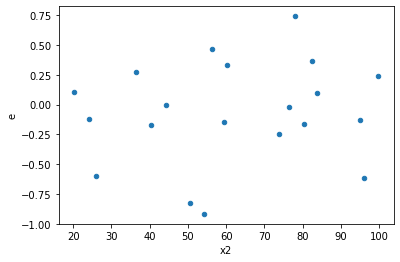

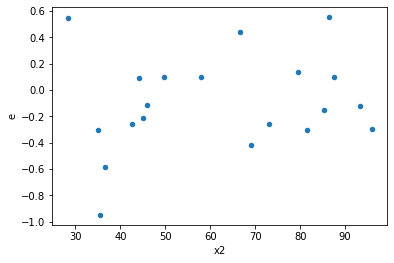

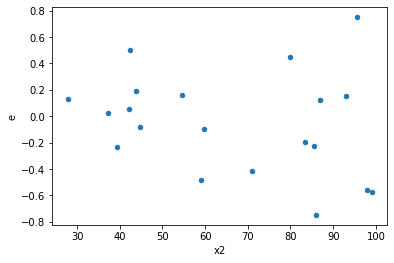

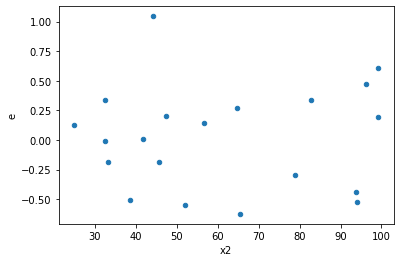

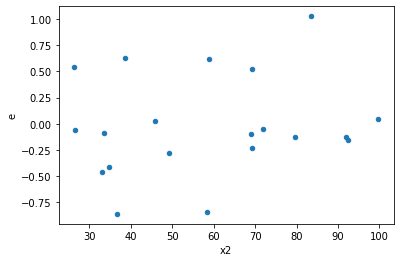

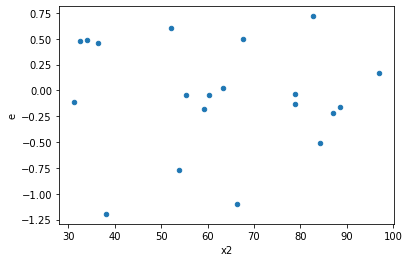

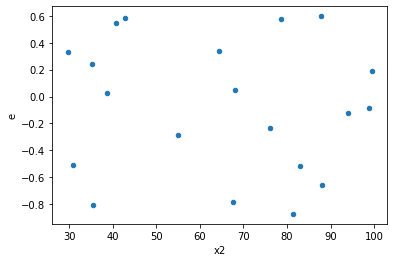

In [11]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [12]:
def get_result(run_replicate):
    new_table = table.loc[run_replicate]

    # show index
    new_table.reset_index(inplace=True)

    new_table.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลออกเป็น 2 กลุ่มด้วย k-mean

    #Set number of clusters
    x = new_table[["y_hat"]]

    #Another important parameter is init, which defines the method initialization to use (default='k-means++').
    #k-means++ algorithm uses the seeding technique for centroid initialization which is better than the random initialization method.
    kmeans = KMeans(n_clusters=2, init='k-means++', random_state=0).fit(x)

    #Generate cluster predictions and store in y_kmeans
    y_kmeans = kmeans.predict(x)

    #kmean_clusters.astype(float)
    kmean_clusters = pd.DataFrame({"clusters" : y_kmeans})

    # เชื่อมข้อมูลทั้ง 2 DataFrame เข้าด้วยกันด้วยคำสั่ง pd.concat
    data_clusters = pd.concat([new_table, kmean_clusters], axis=1)
    #data_clusters.reset_index(inplace=True)

    # กลุ่มที่ 1
    data_cluster0 = data_clusters[data_clusters.clusters == 0]

    y = data_cluster0[['Y']]
    x = data_cluster0[['x1', 'x2']]
    x = sm.add_constant(x)
    model1 = sm.OLS(y, x).fit()

    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # กลุ่มที่ 2
    data_cluster1 = data_clusters[data_clusters.clusters == 1]

    y = data_cluster1[['Y']]
    x = data_cluster1[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()

    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # คำนวณค่าสถิติ
    GQ_test_clusters = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test_clusters, df1, df2)))
    p_greater = ss.f.cdf(GQ_test_clusters, df1, df2)
    p_less = 1.0-ss.f.cdf(GQ_test_clusters, df1, df2)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test_clusters=[]
list_result_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]
#list_result_test01=[]

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test_clusters, two_tailed, p_greater, p_less=get_result(run_replicate)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test_clusters.append(GQ_test_clusters)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future versi

In [13]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
0.0,5.0,11.0,0.054052798652669716,2.4930228877248237,0.010810559730533943,0.22663844433862035,20.96454300127404,5.531651578771779e-05,0.9999723417421061,2.7658257893858895e-05,Reject005=0 : Heteroscedasticity
1.0,11.0,5.0,0.8364058837544568,0.572471993186806,0.07603689852313243,0.11449439863736119,1.5057741814985914,0.6832109623084612,0.6583945188457694,0.3416054811542306,Reject005=1 : Homoscedasticity
5.0,14.0,2.0,1.6136921999869176,0.46900394815919283,0.11526372857049412,0.23450197407959641,2.0344819397038454,0.7562749215333748,0.6218625392333126,0.3781374607666874,Reject005=1 : Homoscedasticity
6.0,2.0,14.0,0.49100321479278436,2.789981468424087,0.24550160739639218,0.1992843906017205,0.8117437303779101,0.9278555356460119,0.5360722321769941,0.46392776782300593,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,1.2971981656700928,2.5512859233761778,0.1621497707087616,0.3189107404220222,1.9667665210259233,0.3581629223919327,0.8209185388040336,0.17908146119596635,Reject005=1 : Homoscedasticity
9.0,12.0,4.0,1.6788148141121773,1.1396242480774248,0.1399012345093481,0.2849060620193562,2.0364799711636494,0.514834665466871,0.7425826672665645,0.2574173327334355,Reject005=1 : Homoscedasticity
10.0,10.0,6.0,0.9106036286235165,1.0724297351412537,0.09106036286235165,0.17873828919020895,1.9628550070725361,0.42269581766801867,0.7886520911659907,0.21134790883400933,Reject005=1 : Homoscedasticity
11.0,3.0,13.0,0.5094095710755666,4.436446976228891,0.1698031903585222,0.341265152017607,2.0097687876008705,0.32476233099850904,0.8376188345007455,0.16238116549925452,Reject005=1 : Homoscedasticity
15.0,9.0,7.0,0.35471251411530497,1.7745453068380257,0.03941250156836722,0.2535064724054322,6.4321335189973965,0.022648590046289385,0.9886757049768553,0.011324295023144693,Reject005=0 : Heteroscedasticity


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test_clusters":list_GQ_test_clusters, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                     if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test_clusters,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,5.0,11.0,0.054052798652669716,2.4930228877248237,0.010810559730533943,0.22663844433862035,20.96454300127404,5.531651578771779e-05,Reject005=0 : Heteroscedasticity
1.0,11.0,5.0,0.8364058837544568,0.572471993186806,0.07603689852313243,0.11449439863736119,1.5057741814985914,0.6832109623084612,Reject005=1 : Homoscedasticity
2.0,12.0,4.0,2.4087933422084897,0.5294311108405122,0.20073277851737414,0.13235777771012805,0.6593730166429794,0.5177683807907986,Reject005=1 : Homoscedasticity
3.0,10.0,6.0,2.5371522159506164,0.5150358579090798,0.25371522159506166,0.0858393096515133,0.33832936436315136,0.1259115303340696,Reject005=1 : Homoscedasticity
4.0,10.0,6.0,1.4565115258557138,0.1416475858491775,0.14565115258557138,0.023607930974862915,0.16208543877462997,0.01239007390918378,Reject005=0 : Heteroscedasticity
5.0,14.0,2.0,1.6136921999869176,0.46900394815919283,0.11526372857049412,0.23450197407959641,2.0344819397038454,0.7562749215333748,Reject005=1 : Homoscedasticity
6.0,2.0,14.0,0.49100321479278436,2.789981468424087,0.24550160739639218,0.1992843906017205,0.8117437303779101,0.9278555356460119,Reject005=1 : Homoscedasticity
7.0,7.0,9.0,2.556438084851228,1.490339735588277,0.36520544069303257,0.165593303954253,0.45342507395293635,0.30960869168393546,Reject005=1 : Homoscedasticity
8.0,8.0,8.0,1.2971981656700928,2.5512859233761778,0.1621497707087616,0.3189107404220222,1.9667665210259233,0.3581629223919327,Reject005=1 : Homoscedasticity


In [15]:
result_show['Result_test'].value_counts()

Reject005=1 : Homoscedasticity      848
Reject005=0 : Heteroscedasticity    152
Name: Result_test, dtype: int64